# Chapter 4: How can we predict heating complaints?
Can a predictive model be built for future prediction of the possibility of heating complaints?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 500
pd.options.display.max_columns = 60

sns.set()
sns.set_style('whitegrid')

In [2]:
df311_h_bronx_merged = pd.read_pickle('df311_h_bronx_merged.pkl')
df311_h_bronx_merged.head()

,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,AssessLand,AssessTot,YearBuilt,LU2,LU3,LU4,LU5,LU6,LU7,LU8,LU9,LU10,LU11,LT1,LT2,LT3,LT4,LT5,LT6,LT7,LT8,LT9,BC1,BC2,BC3,BC4,BC5,Heating Complaint
0,8700,5316,5316,0,0,0,0,0,5316,0,2,1.0,0,2,87.00,100.0,32.0,100.0,39600,153900,1931,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0
1,5000,14550,14550,0,0,0,0,4850,9700,0,1,3.0,0,1,50.00,100.0,50.0,97.0,21600,334350,1931,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0
2,10000,3000,3000,0,0,0,3000,0,0,0,1,1.0,0,1,100.00,100.0,37.5,80.0,117000,329400,1963,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
3,5000,5060,5060,0,792,0,4268,0,0,0,1,1.0,0,1,50.00,100.0,44.0,97.0,39150,329850,1931,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0
4,6258,8026,8026,0,0,0,0,0,8026,0,1,2.0,0,1,62.58,100.0,62.5,100.0,31500,254250,1931,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0


## Evaluation of the logistic regression assumptions

In order to be able to predict the occurrence of heating complaints, a logistic regression is carried out in the following as an exemplary model. This is followed by a review of the extent to which this model could help urban development while also reflecting critically on it.

### The outcome is a binary or dichotomous variable like yes vs no, positive vs negative, 1 vs 0.

As we have already seen before, the variable "Heating Complaint" is clearly binary. No further check is needed.

### There is no influential values (extreme values or outliers) in the continuous predictors

Fortunately, we've already cleant the variables in order to carry out the correlation analysis. Therefore, we can skip this part as well.

Linear relationship between logit of outcome and predictor:

### There is a linear relationship between the logit of the outcome and each predictor variables.
This one is a bit harder to evaluate, as we need to check for linear relationships between each metric variable expect for dummy variables.

In [3]:
df_metric_vars = ['LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'AssessLand', 'AssessTot',
       'YearBuilt']

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


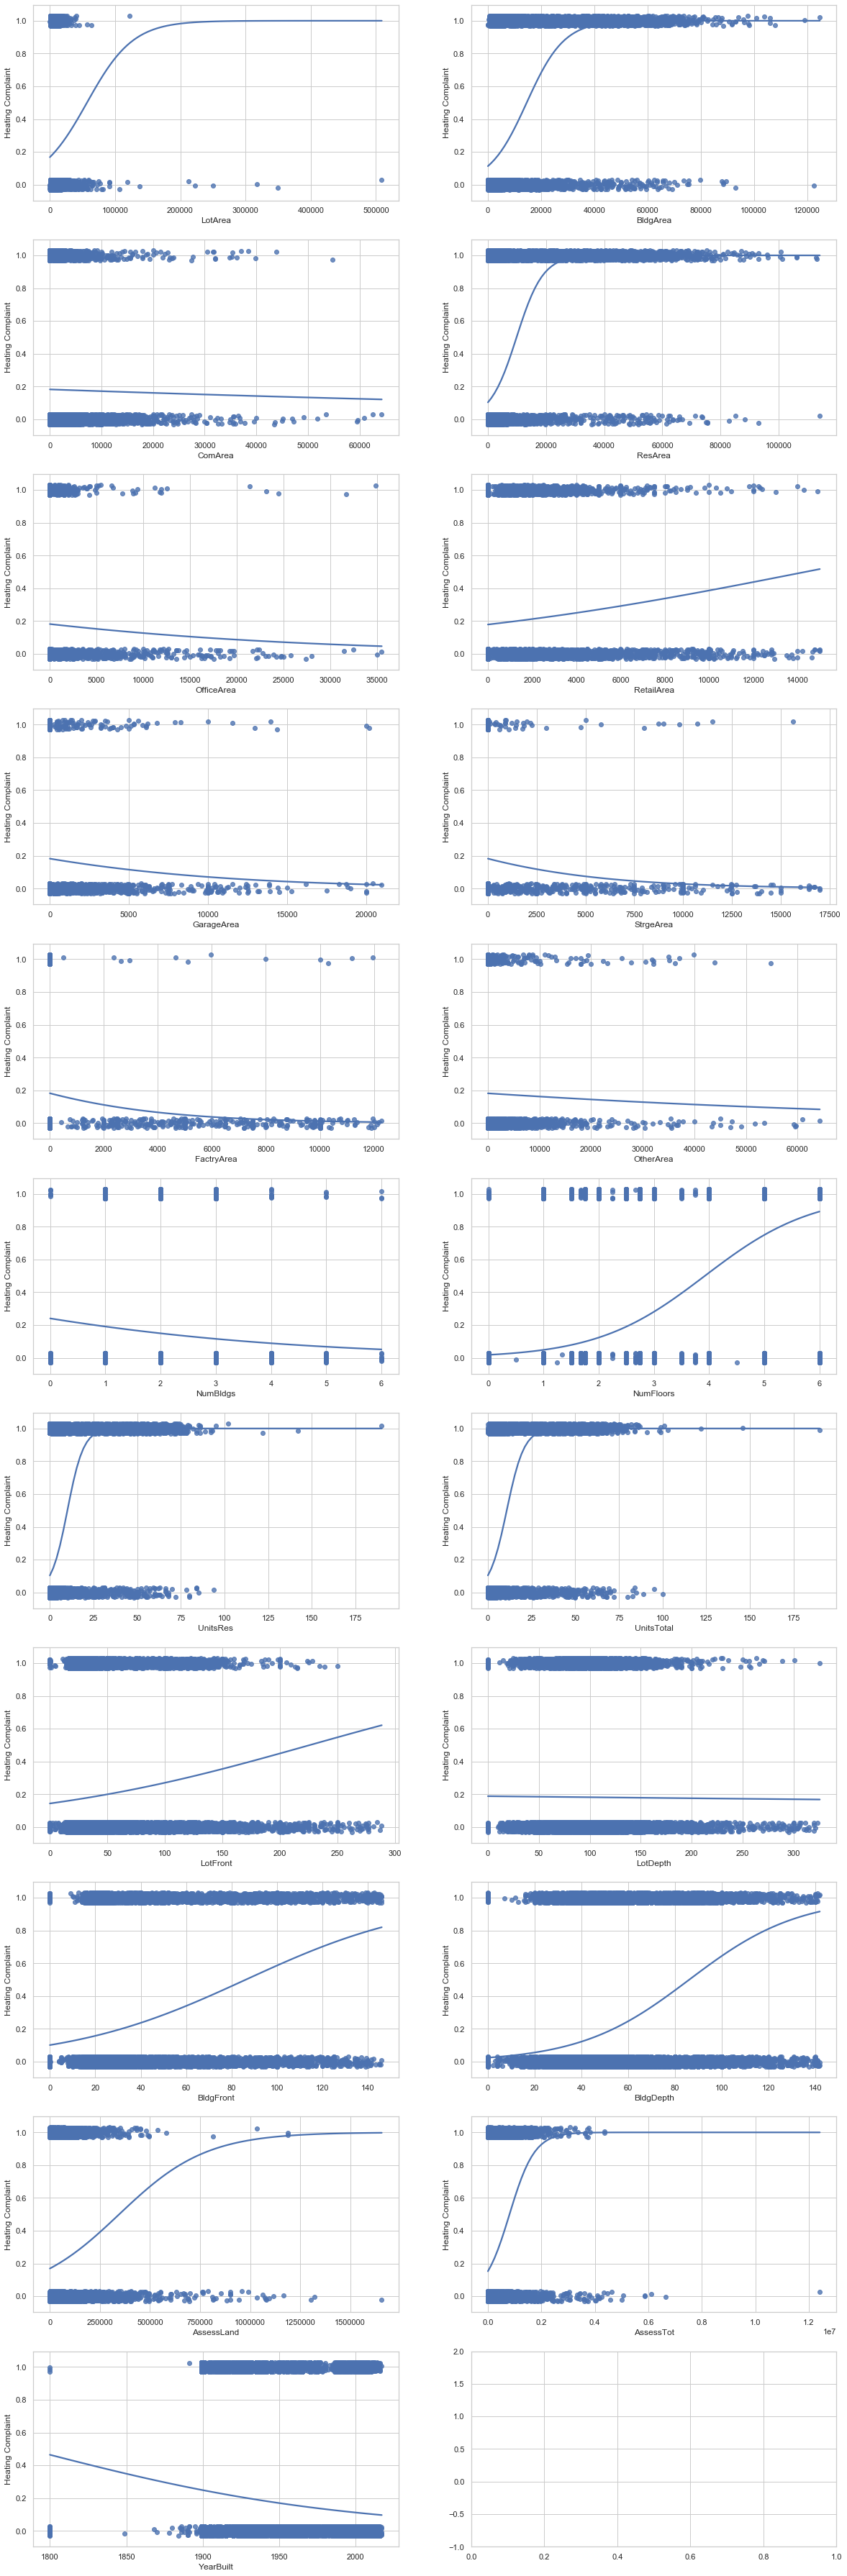

In [4]:
# Below, you will find a code to create a flexible subplot matrix with two columns and n rows, where n reflects ~half of
# the number of elements within a given list.

import math

fig, axes = plt.subplots(math.ceil(len(df_metric_vars)/2), 2, figsize=(20,65))

ax_1 = 0
ax_2 = 0

#ci = None, since plotting multiple logistic regressions using statsmodels is already computationally heavy
for i in df_metric_vars:
    sns.regplot(x=i,y='Heating Complaint',data=df311_h_bronx_merged, logistic=True, y_jitter=0.03, ci=None, ax=axes[ax_1, ax_2])
    plt.ylim(-1,2)    
    if (df_metric_vars.index(i) % 2) != 0:
        ax_1 += 1
    if ax_2 == 0:
        ax_2 += 1
    else:
        ax_2 = 0


#### Note:
We are looking for an s-shape within the regression plots. Most of the plots satisfy this rule quite fine and even some others like "OtherArea" are at least not skewed, thus shouldn't cause that much trouble in the regression model. In case a variable heavily violates this criteria, we could go for regression splines instead, which are useful in non-linear relationships. 

### There are no high intercorrelations (i.e. multicollinearity) among the predictors.
This criteria can be easily checked by a correlation matrix.

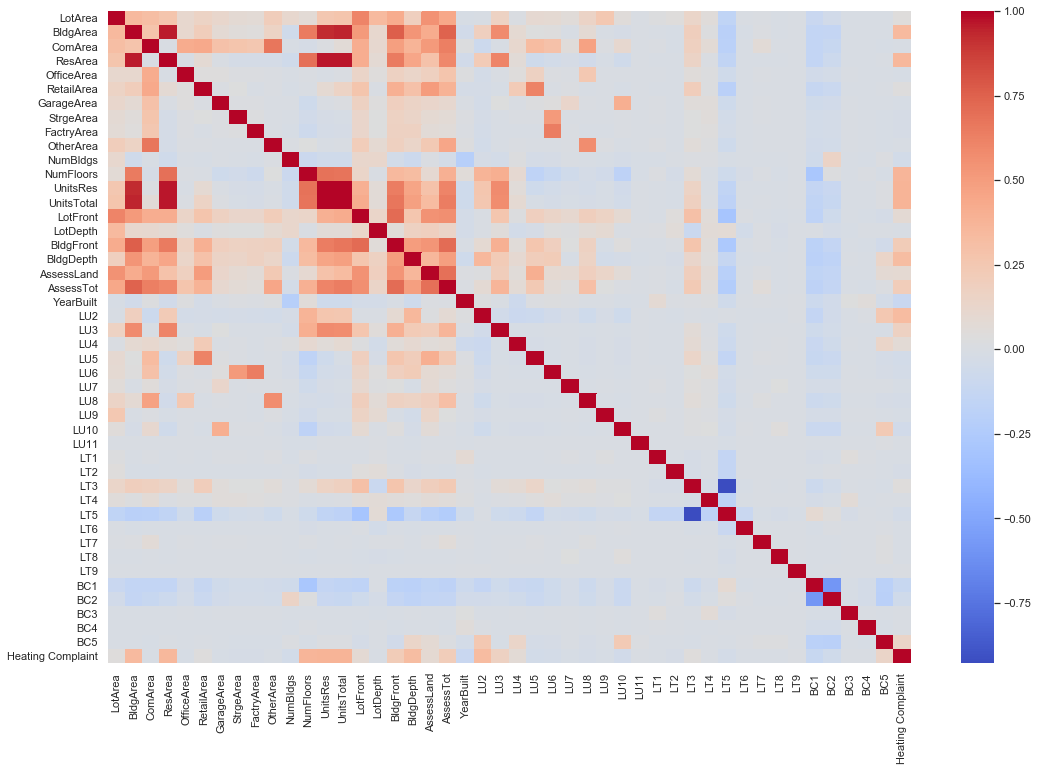

In [5]:
plt.figure(figsize=(18,12))

sns.heatmap(df311_h_bronx_merged.corr(),cmap='coolwarm')
plt.show()

#### Note: 
As we can see, there are some very high correlations to be found among the preditcors. To go into further detail, we need to look for the variance inflation factors ("VIF").

In [6]:
df_merged_cor = df311_h_bronx_merged.corr()
vifs = pd.Series(np.linalg.inv(df311_h_bronx_merged.corr().values).diagonal(), index = df_merged_cor.index)
vifs

LotArea                2.116711
BldgArea             149.142674
ComArea              292.839604
ResArea              153.375862
OfficeArea            41.464464
RetailArea            50.273903
GarageArea            21.212342
StrgeArea             17.939347
FactryArea            18.273424
OtherArea            123.506608
NumBldgs               1.165904
NumFloors              3.135688
UnitsRes             228.740485
UnitsTotal           218.793084
LotFront               3.216895
LotDepth               1.259322
BldgFront              5.136971
BldgDepth              2.273026
AssessLand             3.070254
AssessTot              6.743112
YearBuilt              1.194069
LU2                    1.716951
LU3                    1.797606
LU4                    1.332240
LU5                    2.345746
LU6                    3.176994
LU7                    1.076215
LU8                    1.911342
LU9                    1.150398
LU10                   1.502578
LU11                   1.004071
LT1     

In [7]:
df_h_b_m_cl = df311_h_bronx_merged.copy()

In [8]:
# Cleaning everything in one go, normally you go for the most obvious ones and re-check. 
# It's already done beforehand in this case. You could also go for centering the variables or a 
# principal component analysis ("PCA"), but as the inflation factors are so high (you usually look for VIF >= 10),
# I think, it's appropriate to drop them immediately.
df_h_b_m_cl.drop(['ComArea','UnitsRes','ResArea','BldgArea','UnitsTotal'], axis=1, inplace=True)

In [9]:
df_merged_cor = df_h_b_m_cl.corr()
vifs = pd.Series(np.linalg.inv(df_h_b_m_cl.corr().values).diagonal(), index = df_merged_cor.index)
vifs

LotArea               2.107699
OfficeArea            1.373830
RetailArea            2.503806
GarageArea            1.376406
StrgeArea             1.813948
FactryArea            2.248056
OtherArea             2.198051
NumBldgs              1.164237
NumFloors             2.612392
LotFront              3.204526
LotDepth              1.256021
BldgFront             4.092108
BldgDepth             2.118133
AssessLand            3.007509
AssessTot             5.004745
YearBuilt             1.172120
LU2                   1.672914
LU3                   1.613730
LU4                   1.255400
LU5                   2.225118
LU6                   3.147684
LU7                   1.071629
LU8                   1.847286
LU9                   1.139623
LU10                  1.480428
LU11                  1.003903
LT1                   1.572130
LT2                   1.574724
LT3                  23.156619
LT4                   1.930858
LT5                  24.947361
LT6                   1.336856
LT7     

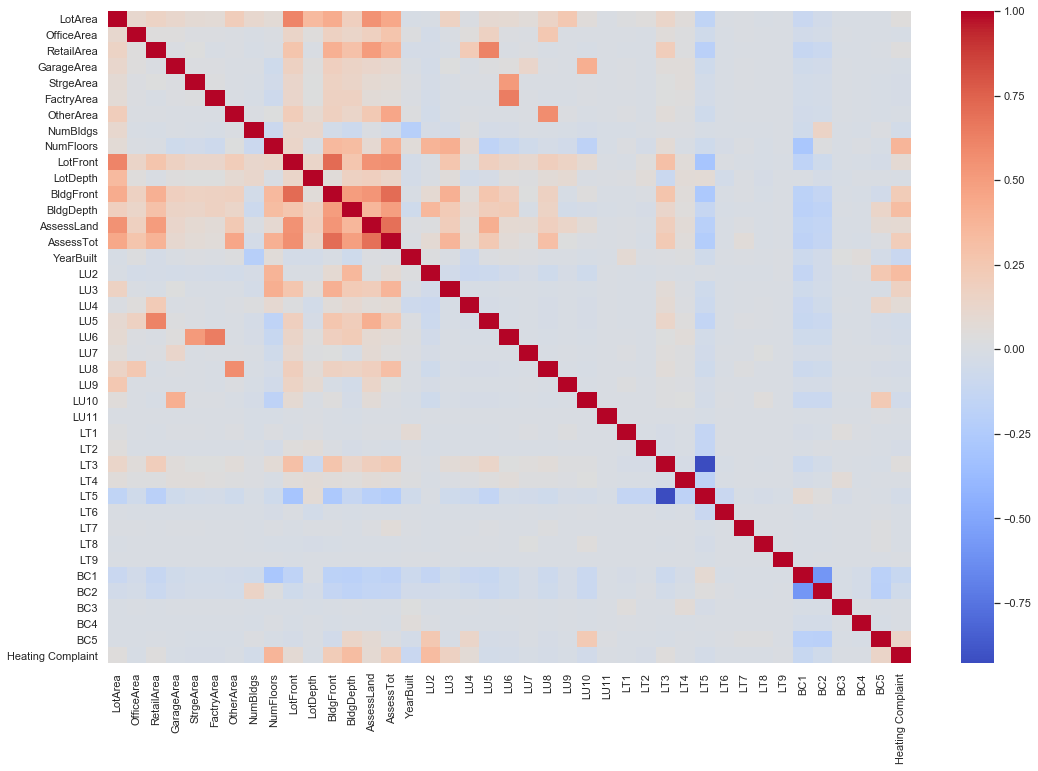

In [10]:
plt.figure(figsize=(18,12))

sns.heatmap(df_h_b_m_cl.corr(),cmap='coolwarm')
plt.show()

#### Note:
This is looking a lot better. Please be aware, that a high VIF between dummy variables is usually not considered an issue.

## Implementing the logistic regression model

First and foremost, I'm implementing an initial logistic regression model through Statsmodels, which provides a nice R-like summary. Before that, it needs to be standardized to be processed properly. Please be aware, that standardization is NOT (!) required for logistic regression, however, I'm noticed some computational issues causing errors within the process, so I've decided to standardize the data.

In [11]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

X = df_h_b_m_cl.drop('Heating Complaint',axis=1)
y = df_h_b_m_cl['Heating Complaint']

scaled_features = StandardScaler().fit_transform(X.values)
X_scaled = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

In [12]:
X_scaled_wc = sm.add_constant(X_scaled)
reg_log = sm.Logit(y,X_scaled_wc)
results_log = reg_log.fit()
# Get the regression summary
results_log.summary()

         Current function value: 0.368043
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Heating Complaint   No. Observations:                73141
Model:                          Logit   Df Residuals:                    73100
Method:                           MLE   Df Model:                           40
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:                  0.2243
Time:                        17:44:05   Log-Likelihood:                -26919.
converged:                      False   LL-Null:                       -34701.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8410     10.426     -0.177      0.860     -22.276      18.593
LotArea       -0.0977      0.045     -2.159      0.031      -0.186      -0.009
OfficeArea    -0.0748      0.016     -4.701      0.000      -0.106      -0.044
RetailArea    -0.1072      0.020     -5.251      0.000      -0.147      -0.067
GarageArea    -0.0331      0.018     -1.850      0.064      -0.068       0.002
StrgeArea     -0.0429      0.024     -1.777      0.076      -0.090       0.004
FactryArea    -0.0395      0.029     -1.364      0.173      -0.096       0.017
OtherArea     -0.0635      0.018     -3.469      0.001      -0.099      -0.028
NumBldgs      -0.0444      0.012     -3.579      0.000      -0.069      -0.020
NumFloors      0.4327      0.018     23.643      0.000       0.397       0.469
LotFront      -0.1435      0.032     -4.487      0.000      -0.206      -0.081
LotDepth      -0.1303      0.016     -8.397      0.000      -0.161      -0.100
BldgFront      0.2813      0.028     10.135      0.000       0.227       0.336
BldgDepth      0.5396      0.016     32.748      0.000       0.507       0.572
AssessLand    -0.0285      0.023     -1.236      0.216      -0.074       0.017
AssessTot      0.1244      0.027      4.612      0.000       0.072       0.177
YearBuilt     -0.2756      0.012    -23.830      0.000      -0.298      -0.253
LU2            0.3551      0.012     29.408      0.000       0.331       0.379
LU3            0.0233      0.016      1.490      0.136      -0.007       0.054
LU4            0.0980      0.010      9.332      0.000       0.077       0.119
LU5           -0.1626      0.022     -7.410      0.000      -0.206      -0.120
LU6           -0.2260      0.038     -5.928      0.000      -0.301      -0.151
LU7           -0.0470      0.023     -2.047      0.041      -0.092      -0.002
LU8           -0.1397      0.020     -7.146      0.000      -0.178      -0.101
LU9            0.0101      0.024      0.431      0.666      -0.036       0.056
LU10          -0.2270      0.032     -7.158      0.000      -0.289      -0.165
LU11          -0.0809   2187.295   -3.7e-05      1.000   -4287.100    4286.938
LT1            0.0272      0.014      1.903      0.057      -0.001       0.055
LT2           -0.0711      0.031     -2.304      0.021      -0.132      -0.011
LT3            0.0577      0.059      0.986      0.324      -0.057       0.173
LT4            0.0428      0.016      2.668      0.008       0.011       0.074
LT5            0.0763      0.061      1.251      0.211      -0.043       0.196
LT6            0.0117      0.013      0.869      0.385      -0.015       0.038
LT7           -0.0859     48.217     -0.002      0.999     -94.590      94.418
LT8           -0.2031    142.533     -0.001      0.999    -279.562     279.156
LT9            0.1010   1725.859   5.85e-05      1.000   -3382.520    3382.722
BC1            0.0130      0.020      0.664      0.507      -0.025       0.051
BC2            0.0182      0.018      1.030      0.303      -0.016       0.053
BC

In [13]:
# Since Statsmodels doesn't provide a confusion matrix natively, we need to create our own. Credits go out to the team of 
# 365 Data Science (https://365datascience.com) for providing this function below in one of their data science courses.

def confusion_matrix(data,actual_values,model):
        pred_values = model.predict(data)
        bins=np.array([0,0.5,1])
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        return cm, accuracy
    
confusion_matrix(X_scaled_wc,y,results_log)

(array([[58444.,  1384.],
        [ 9037.,  4276.]]),
 0.857521773013768)

#### Note:
According to the confusion matrix, the accuracy seems to be relatively high by nature (approx. 86%), which is pleasant to see. The pseudo R2 of 22.4% may certainly be higher, but we discover some variables with a significant influence. 

At this point one could be inclined to leave only the really significant variables in the data by feature selection, but this step must not be done before validation, otherwise a strong bias will be generated.

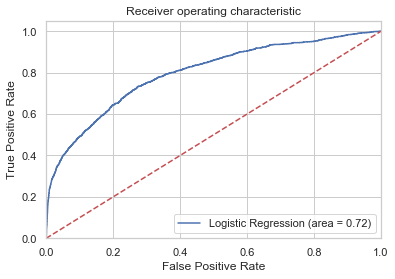

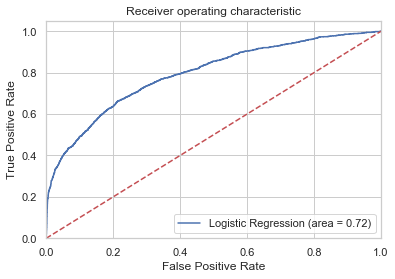

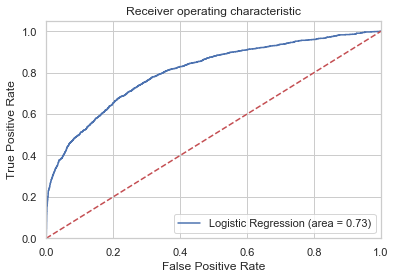

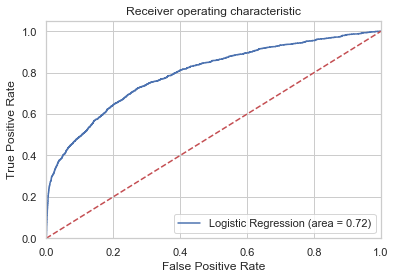

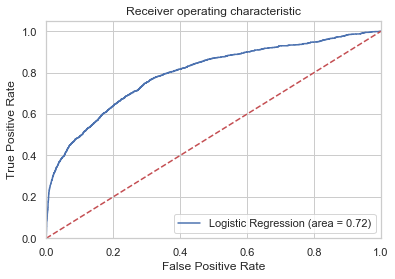

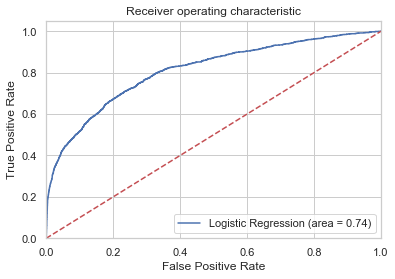

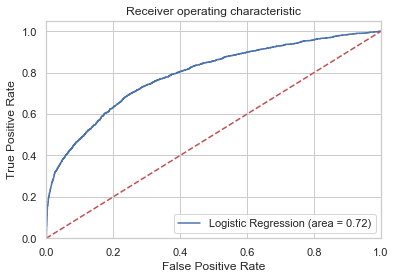

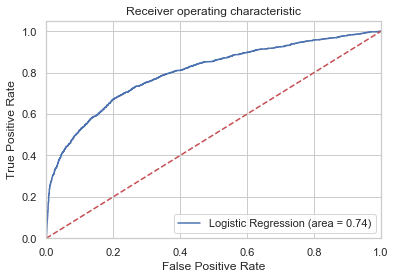

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# We also ignore warnings, as the following code yields a conversion warning, but is executed properly.
import warnings
warnings.filterwarnings('ignore')

X = df_h_b_m_cl.drop('Heating Complaint',axis=1)
y = df_h_b_m_cl['Heating Complaint']

# The StratifiedKFold algorithm is used to maintain the same ratio of complaints and non-complaints across all folds.
# This is required due to the unbalanced nature of the data.
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=1)

# Setting up some placeholder variables, which are filled below for further analysis.
conf, report, feat_imp, logit_roc_auc = [], [], [], []
for train, test in skf.split(X, y):
    
    # Scalingta in order to allow the regression algorithm to work properly on the data. Normally, standardization is not 
    # required in logistic regression, however, the dataset we use causes some computational issues without it.  
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X.loc[train].values)
    X_train_scaled = pd.DataFrame(scaled_X_train, index=X.loc[train].index, columns=X.loc[train].columns)
    scaled_X_test = scaler.transform(X.loc[test].values)
    X_test_scaled = pd.DataFrame(scaled_X_test, index=X.loc[test].index, columns=X.loc[test].columns)
    
    # Oversampling through SMOTE added to the model to increase recall as the data is unbalanced. Since 
    # positive heating complaints are underrepresented, I would like to make sure to sample them up, so it's more
    # likely that cases are considered "heating complaints", even if it's not always the case. Without oversampling the data
    # the algorithm would be much better in classifying a data set as "no heat complaint" even though they are actual complaints.
    # If the goal is to calculate highly conservatively, however, we can decide to remove the SMOTE algorithm.
    os = SMOTE(random_state=0)
    os_data_X,os_data_y=os.fit_sample(X_train_scaled, y.loc[train])
    os_data_X = pd.DataFrame(data=os_data_X,columns=X_train_scaled.columns)
    os_data_y= pd.DataFrame(data=os_data_y)
    
    # Feature elimination within each fold to guarantee an unbiased feature handling. We use
    # RandomForestClassifier to do this job, as it's fairly easy to implement within the KFold loop
    # and usually yields solid results.
    rf = RandomForestClassifier(n_jobs=-1, random_state=999)
    rf.fit(os_data_X, os_data_y)
    important_features = pd.Series(data=rf.feature_importances_.round(4),index=X_train_scaled.columns)
    important_features.sort_values(ascending=False,inplace=True)
    feat_imp.append(important_features)
    
    # The threshold has been defined after(!) executing this Kfold loop. It turned out, that all features yielding an importance
    # below 0.0005 didn't decrease the precision and therefore allowed for a more simplified variable structure. 
    cols = X_train_scaled.columns[important_features >= 0.0005]
    
    # Fitting the model
    logreg = LogisticRegression()
    logreg.fit(os_data_X[cols], os_data_y)
    
    # Saving confusion matrix as well as the classification report outputs for further analysis down the road.
    y_pred = logreg.predict(X_test_scaled[cols])
    conf.append(confusion_matrix(y.loc[test],y_pred))
    report.append(classification_report(y.loc[test],y_pred))
    
    # Output of ROC curve per fold in order to provide a graphical insight into the performance of the regression model
    logit_roc_auc = roc_auc_score(y.loc[test], logreg.predict(X_test_scaled[cols]))
    fpr, tpr, thresholds = roc_curve(y.loc[test], logreg.predict_proba(X_test_scaled[cols])[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    

In [15]:
# Overview of the importance of features within each fold
counter = 1
for i in feat_imp:
    print("Important features of fold " + str(counter))
    print(i)
    counter+=1

Important features of fold 1
BldgDepth     0.1405
AssessTot     0.1237
AssessLand    0.1067
YearBuilt     0.1027
BldgFront     0.1023
NumFloors     0.0764
LotArea       0.0735
LotFront      0.0666
LotDepth      0.0631
LU2           0.0606
NumBldgs      0.0116
BC2           0.0091
BC1           0.0087
RetailArea    0.0067
BC5           0.0065
LT5           0.0056
LU4           0.0054
LT3           0.0052
LU3           0.0048
LU5           0.0038
OtherArea     0.0035
OfficeArea    0.0027
LU8           0.0019
LU10          0.0016
LU6           0.0014
GarageArea    0.0014
StrgeArea     0.0011
FactryArea    0.0008
BC4           0.0006
LT4           0.0005
LT1           0.0004
LT2           0.0002
LT6           0.0002
LU9           0.0001
BC3           0.0001
LU7           0.0001
LU11          0.0000
LT7           0.0000
LT8           0.0000
LT9           0.0000
dtype: float64
Important features of fold 2
BldgDepth     0.1398
AssessTot     0.1247
AssessLand    0.1062
BldgFront     0.1026
Yea

In [16]:
# Overview of the confusion matrix outputs from each fold
counter = 1
for i in conf:
    
    print("Confusion matrix of fold " + str(counter))
    print(i)
    counter+=1

Confusion matrix of fold 1
[[5903 1576]
 [ 579 1085]]
Confusion matrix of fold 2
[[5929 1550]
 [ 582 1082]]
Confusion matrix of fold 3
[[5917 1562]
 [ 555 1109]]
Confusion matrix of fold 4
[[5973 1506]
 [ 591 1073]]
Confusion matrix of fold 5
[[5953 1525]
 [ 590 1075]]
Confusion matrix of fold 6
[[5909 1569]
 [ 532 1132]]
Confusion matrix of fold 7
[[5939 1539]
 [ 600 1064]]
Confusion matrix of fold 8
[[5943 1535]
 [ 538 1126]]


In [17]:
# Overview of the classification reports from each fold
counter = 1
for i in report:
    print("Classification report of fold " + str(counter))
    print(i)
    counter+=1

Classification report of fold 1
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85      7479
         1.0       0.41      0.65      0.50      1664

    accuracy                           0.76      9143
   macro avg       0.66      0.72      0.67      9143
weighted avg       0.82      0.76      0.78      9143

Classification report of fold 2
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85      7479
         1.0       0.41      0.65      0.50      1664

    accuracy                           0.77      9143
   macro avg       0.66      0.72      0.68      9143
weighted avg       0.82      0.77      0.79      9143

Classification report of fold 3
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85      7479
         1.0       0.42      0.67      0.51      1664

    accuracy                           0.77      9143
   macro avg       0.66      0.7

## Conclusion

The logistic regression model has a solid precision rating of just under 80%. However, it should not be overlooked that due to oversampling there is a tendency to classify cases as "heating complaints", even if some of them are not complaints at all, which is certainly a reason for further improvement of the model. This behaviour has been chosen intentionally, as it could be considered good, if the prediction of heating complaints is slightly more positive than the actual reality, as it might lead to prepare capacities accordingly. 

Without oversampling, the model leaned towards underpredicting the heating complaints, thus potentially causing issues in terms of future planning, as the city might be unprepared to the high amount of complaints occuring.

Already the first run of the regression overview per Statsmodels showed a pseudo-R² of about 22%, which is at least an indicator that there could be some variables involved, that we have not covered with our data, but which could be a major factor for the occurrence of complaints. 

Nevertheless, the model should be lead to an improvement of urban planning, as it still has a significant predictive effect and is therefore able to provide a framework for help prevent heating complaints. 